In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
searches_raw = pd.read_csv("E:/Data Science/Upwork task/Searches_raw.CSV");
searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-11-13 23,2,34,94
1,2016-11-13 22,7,47,87
2,2016-11-13 21,14,44,76
3,2016-11-13 20,5,40,89
4,2016-11-13 19,7,37,84


In [3]:
Activies_raw = pd.read_csv("E:/Data Science/Upwork task/Activity_raw.CSV");
Activies_raw.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19,58,26,4,22,17,0.4,0.46,12


In [4]:
searches_raw.shape

(168, 4)

### Number of unique searches with 100% coverage :

Number of unique searches with 100% coverage will be sum of (people saw +1 cars) column when coverage equals 100 as during these periods there are no people who saw 0 cars :

In [21]:
Total_searches_wth_100_coverage = searches_raw['People saw +1 cars (unique)'][searches_raw['Coverage Ratio (unique)']==100].sum()
Total_searches_wth_100_coverage

38

#### Number of unique searches during full coverage = 38

In [6]:
searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-11-13 23,2,34,94
1,2016-11-13 22,7,47,87
2,2016-11-13 21,14,44,76
3,2016-11-13 20,5,40,89
4,2016-11-13 19,7,37,84


### Demand and supply throughout the week :

Demand for each hour would be the people search for car (the summation of people saw 0 and people saw 1).

Supply for each hour would be Active drive column in Activity_raw dataframe.

In [7]:
searches_raw['total_searches'] = searches_raw['People saw 0 cars (unique)'] + searches_raw['People saw +1 cars (unique)']
searches_raw['Active drivers'] = Activies_raw['Active drivers']
searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers
0,2016-11-13 23,2,34,94,36,45
1,2016-11-13 22,7,47,87,54,58
2,2016-11-13 21,14,44,76,58,72
3,2016-11-13 20,5,40,89,45,74
4,2016-11-13 19,7,37,84,44,58


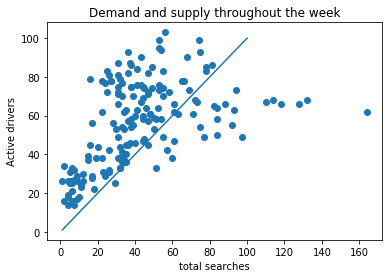

In [8]:
plt.scatter(data=searches_raw , x='total_searches' , y='Active drivers')
plt.xlabel('total searches')
plt.ylabel('Active drivers')
plt.title('Demand and supply throughout the week')

x = [1,2,3,100]
y = [1,2,3,100]
plt.plot(x,y)
plt.show()

#### Points on the right side of the line represent cases when people search for cars in specific hour more times than actual available drivers.

### Coverage heatmap throughout the week :

Preparing Searches_raw dataframe for drawing Coverage heatmap along the week :

In [9]:
# Convert date column to float in order to use it for heat map
searches_raw['Date_modified'] = searches_raw['Date'].str[11:]
searches_raw['Date_modified'] = searches_raw['Date_modified'].astype(float)
searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers,Date_modified
0,2016-11-13 23,2,34,94,36,45,23.0
1,2016-11-13 22,7,47,87,54,58,22.0
2,2016-11-13 21,14,44,76,58,72,21.0
3,2016-11-13 20,5,40,89,45,74,20.0
4,2016-11-13 19,7,37,84,44,58,19.0


In [10]:
searches_raw['Days'] = searches_raw['Date'].str[8:10]
searches_raw['Days'] = searches_raw['Days'].astype(float)
searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers,Date_modified,Days
0,2016-11-13 23,2,34,94,36,45,23.0,13.0
1,2016-11-13 22,7,47,87,54,58,22.0,13.0
2,2016-11-13 21,14,44,76,58,72,21.0,13.0
3,2016-11-13 20,5,40,89,45,74,20.0,13.0
4,2016-11-13 19,7,37,84,44,58,19.0,13.0


In [11]:
searches_raw.tail()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers,Date_modified,Days
163,2016-11-07 04,2,2,50,4,19,4.0,7.0
164,2016-11-07 03,2,0,0,2,16,3.0,7.0
165,2016-11-07 02,2,2,50,4,18,2.0,7.0
166,2016-11-07 01,4,13,76,17,29,1.0,7.0
167,2016-11-07 00,5,21,81,26,42,0.0,7.0


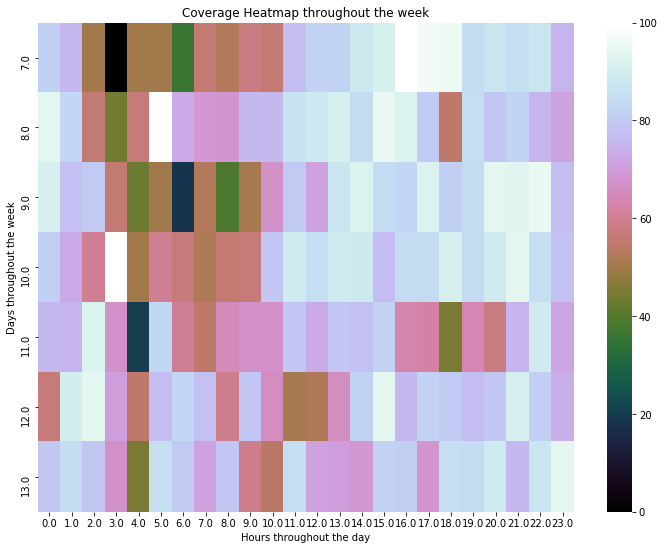

In [12]:
coverage = searches_raw.pivot("Days", "Date_modified", "Coverage Ratio (unique)")
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(coverage , cmap = "cubehelix")
plt.xlabel('Hours throughout the day');
plt.ylabel('Days throughout the week');
plt.title('Coverage Heatmap throughout the week');
plt.show();

#### From the heatmap above, if we look at each row we can figure how is the coverage during each day throughout the week. For example, it seems that the first, third and fifth days of the week  (7,9,11) are the days with lowest coverage (rows with the most dark color cells).

#### We also can make sure of the above ovservation using the exact number of coverage per each day :

In [13]:
searches_raw_each_day = searches_raw.groupby(['Days']).sum()
searches_raw_each_day

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers,Date_modified
Days,,,,,,
7.0,181,563,1697,744,1221,276.0
8.0,217,697,1859,914,1477,276.0
9.0,258,731,1739,989,1454,276.0
10.0,194,665,1842,859,1562,276.0
11.0,456,927,1646,1383,1300,276.0
12.0,307,835,1793,1142,1265,276.0
13.0,245,771,1823,1016,1167,276.0


#### On the other side, if we look at each column of cells we can observe the coverage during specific hour in all days and we can easily observe the coverage problem during period between 2 and 9 AM. This also can be proven using analysis and numbers along with the map.

In [14]:
searches_raw_for_each_hour = searches_raw.groupby(['Date_modified']).sum()
searches_raw_for_each_hour

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Active drivers,Days
Date_modified,,,,,,
0.0,111,276,559,387,353,70.0
1.0,34,159,559,193,297,70.0
2.0,25,104,511,129,234,70.0
3.0,44,80,404,124,198,70.0
4.0,57,52,320,109,182,70.0
5.0,18,57,505,75,174,70.0
6.0,32,49,407,81,199,70.0
7.0,82,124,434,206,252,70.0
8.0,186,242,419,428,314,70.0


#### Based on previous observations, our first decision can be introducing higher pricing to drivers during period between 2 to 9 AM each day to motivate them to work during this period or just make it highly cost for customer during this period. 

#### Also if you have coverage data for more than one week and notice the same pattern that at specific days we suffer from low coverage (like the first, third and fifth day problem in our week coverage data), we can offer higher pricing for drivers in these days each week.

### Weekly finished trips with maximum coverage :

Let's see the number of finished rides while coverage was 100%. This will be done after goining the Two dataframes :

In [18]:
#Two_data_combined = searches_raw.set_index('date').join(Activies_raw.set_index('date'))
Two_data_combined = searches_raw.join(Activies_raw, lsuffix='_caller', rsuffix='_other')
Two_data_combined.drop(['Date_other','Active drivers_caller'] , axis=1 , inplace=True)
Two_data_combined.head()

,Date_caller,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Date_modified,Days,Active drivers_other,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23,2,34,94,36,23.0,13.0,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22,7,47,87,54,22.0,13.0,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21,14,44,76,58,21.0,13.0,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20,5,40,89,45,20.0,13.0,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19,7,37,84,44,19.0,13.0,58,26,4,22,17,0.4,0.46,12


In [20]:
Finished_trips_with_full_coverage = Two_data_combined['Finished Rides'][Two_data_combined['Coverage Ratio (unique)']==100]
Finished_trips_with_full_coverage.sum()

10

#### Number of weekly finished trips during maximum coverage = 10 Rides.

#### Only 10 trips per week were finished while full coverage. This makes sense as during full coverage, most of the drivers are available for client booking and don't have rides to be finished.

### Driver utilization rate :

#### Five most utilized hours of the week :

In [23]:
Most_utilized_hours_data = Two_data_combined.nlargest(5, 'total_searches')
Most_utilized_hours_data

,Date_caller,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),total_searches,Date_modified,Days,Active drivers_other,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
47,2016-11-12 00,70,94,57,164,0.0,12.0,62,27,20,8,13,0.4,1.74,47
52,2016-11-11 19,47,85,64,132,19.0,11.0,68,27,18,10,17,0.4,1.33,36
53,2016-11-11 18,71,57,45,128,18.0,11.0,66,27,19,9,17,0.4,1.07,29
48,2016-11-11 23,33,85,72,118,23.0,11.0,66,27,12,16,14,0.4,1.48,40
51,2016-11-11 20,48,66,58,114,20.0,11.0,68,25,17,8,19,0.4,1.24,31


In [25]:
Most_utilized_hours = Most_utilized_hours_data['Date_caller']
Most_utilized_hours

47    2016-11-12 00
52    2016-11-11 19
53    2016-11-11 18
48    2016-11-11 23
51    2016-11-11 20
Name: Date_caller, dtype: object

#### Number of finished trips in most utilized hours :

In [27]:
Finished_trips_in_utilized_hours = Most_utilized_hours_data['Finished Rides'].sum()
Finished_trips_in_utilized_hours

183

#### Driver utilization rate in Five most utilized hours : 

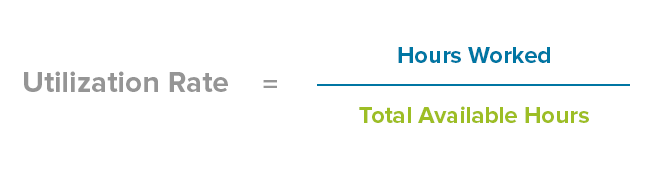

In [31]:
Hours_worked = Most_utilized_hours_data['Has booking (h)'].sum() + Most_utilized_hours_data['Waiting for booking (h)'].sum() + Most_utilized_hours_data['Online (h)'].sum()
Hours_not_actually_riding = Most_utilized_hours_data['Busy (h)'].sum()
Utilization_rate_in_most_utilized_hours = Hours_worked / (Hours_worked + Hours_not_actually_riding)
Utilization_rate_in_most_utilized_hours

0.7714285714285715

#### Driver utilization rate in most utilized hours = 77.1 %

#### Utilization rate in Five most utilized hours shows that we can encourage drivers to  be more availabe during specific hours in order to increase coverage percentage and have more finished rides during the whole week. 

## Conclusion :

It is now clear that there are specific hours during each day when the demand is high and there is a coverage problem. Availability -which is one of the most important features for riding hailing apps customers- can be increased by putting special pricing plan for such hours.

Driver utilization rate shows that one of the solutions for obtaining higher coverage during most utilized hours could be adding driver incentives during these hours in order to encourge them giving more attension to such hours which would highly affect the whole business